In [66]:
from selenium.webdriver import Firefox
from bs4 import BeautifulSoup
import random
import pandas as pd
import numpy as np
import time
from matplotlib.pyplot import text

In [24]:
def sleep(start=5, end=15):
    return time.sleep(random.randint(5, 15))

In [43]:
browser = Firefox()

In [44]:
browser.get('https://www.glassdoor.com/index.htm')

In [5]:
css_selector = '#KeywordSearch'
sleep()
keyword_search = browser.find_element_by_css_selector(css_selector)
sleep()
keyword_search.click()
keyword_search.send_keys('Senior Software Development Leader')
search_css = '#HeroSearchButton'
start_search = browser.find_element_by_css_selector(search_css)
start_search.click()

In [16]:
job_listings = browser.find_elements_by_class_name('jl')

In [17]:
len(job_listings)

30

In [10]:
job_listings[1].click()

In [18]:
contents = []
sleep()
for job in job_listings:
    job.location_once_scrolled_into_view
    sleep()
    job.click()
    content = browser.find_element_by_class_name('jobDescriptionContent')
    contents.append(content.text)
    sleep()

In [19]:
len(contents)

30

In [76]:
len(pages)

5

In [77]:
pages[3].click()

In [55]:
class ScrapeGlass():
    
    def __init__(self, param=None):
        self.browser = Firefox()
        self.final_content = []
    
    def click_wait(self):
        listings = self.browser.find_elements_by_class_name('jl')
        listings[1].click()
        self.sleep()
        x_button = self.browser.find_element_by_class_name('xBtn')
        x_button.click()
    
    def return_final_content(self):
        return self.final_content
    
    def sleep(start=5, end=15):
        return time.sleep(random.randint(5, 15))
        
    def search(self, url, query):
        self.browser.get(url)
        self.sleep()
        keyword_search = self.browser.find_element_by_css_selector('#KeywordSearch')
        keyword_search.click()
        keyword_search.send_keys(query)
        start_search = self.browser.find_element_by_css_selector('#HeroSearchButton')
        start_search.click()
    
    def loop_pages(self):
        pages = self.browser.find_elements_by_class_name('page')
        while len(pages) == 5:
            self.final_content.extend(self.get_job_postings())
            next_button = self.browser.find_element_by_class_name('next')
            next_button.click()
            sleep()
    
    def get_job_postings(self):
        job_listings = self.browser.find_elements_by_class_name('jl')
        sleep()
        job_descriptions = []
        for job in job_listings:
            job.location_once_scrolled_into_view
            job.click()
            sleep()
            content = self.browser.find_element_by_class_name('jobDescriptionContent')
            job_descriptions.append(content.text)
            choice = random.randint(1,3)
            if choice == 2:
                tabs = self.browser.find_elements_by_class_name('tabLabel')
                try:    
                    tabs[random.randint(1,2)].click()
                except IndexError:
                    pass
            sleep()
        return job_descriptions


In [56]:
test = ScrapeGlass()

In [57]:
test.search('https://www.glassdoor.com', 'Customer Success Specialist')

In [60]:
test.click_wait()

In [67]:
# test.loop_pages()

In [63]:
carolyn = test.return_final_content()

In [64]:
len(carolyn)

31

In [54]:
len(final_content)

150

In [58]:
chris_jobs = final_content.copy()

In [59]:
len(chris_jobs)

150

In [77]:
test_job = chris_jobs[0].split('\n')

In [86]:
clean_jobs = [job.split('\n') for job in chris_jobs]

In [ ]:
len(clean_jobs)

In [ ]:
for chunk in clean_jobs[0]:
    print(chunk)

In [ ]:
label = input('yes / no')

In [78]:
for elem in test_job:
    print(elem)

IFS – the Global Enterprise Applications Company

Job Title: Senior Partner Development Manager | Global Alliances

Location: North America

IFS develops and delivers enterprise software for customers around the world who manufacture and distribute goods, maintain assets, and manage service-focused operations. The industry expertise of our people and solutions, together with commitment to our customers, has made us a recognized leader and the most recommended supplier in our sector. Our team of 3,300 employees supports more than one million users worldwide from a network of local offices and through our growing ecosystem of partners.
Summary

The Senior Partner Development Manager shall be responsible for the continued development and strategic relationship for the IFS alliance with Microsoft.

In this role the Senior Partner Development Manager will facilitate the continued development and execution of strategic business plans to meet or exceed assigned business goals. Work with Micro

Text(0.5,0.5,'[\'IFS – the Global Enterprise Applications Company\', \'\', \'Job Title: Senior Partner Development Manager | Global Alliances\', \'\', \'Location: North America\', \'\', \'IFS develops and delivers enterprise software for customers around the world who manufacture and distribute goods, maintain assets, and manage service-focused operations. The industry expertise of our people and solutions, together with commitment to our customers, has made us a recognized leader and the most recommended supplier in our sector. Our team of 3,300 employees supports more than one million users worldwide from a network of local offices and through our growing ecosystem of partners.\', \'Summary\', \'\', \'The Senior Partner Development Manager shall be responsible for the continued development and strategic relationship for the IFS alliance with Microsoft.\', \'\', \'In this role the Senior Partner Development Manager will facilitate the continued development and execution of strategic b

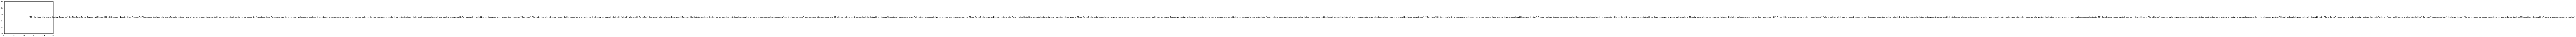

In [73]:
text(0.5, 0.5, chris_jobs[0].split('\n'))

In [70]:
text?

Signature: text(x, y, s, fontdict=None, withdash=False, **kwargs)
Docstring:
Add text to the axes.

Add the text *s* to the axes at location *x*, *y* in data coordinates.

Parameters
----------
x, y : scalars
    The position to place the text. By default, this is in data
    coordinates. The coordinate system can be changed using the
    *transform* parameter.

s : str
    The text.

fontdict : dictionary, optional, default: None
    A dictionary to override the default text properties. If fontdict
    is None, the defaults are determined by your rc parameters.

withdash : boolean, optional, default: False
    Creates a `~matplotlib.text.TextWithDash` instance instead of a
    `~matplotlib.text.Text` instance.

Returns
-------
text : `.Text`
    The created `.Text` instance.

Other Parameters
----------------
**kwargs : `~matplotlib.text.Text` properties.
    Other miscellaneous text parameters.

Examples
--------
Individual keyword arguments can be used to override any given
paramete

In [41]:
browser = Firefox()

In [42]:
browser.get('https://www.glassdoor.com')

In [43]:
listings = browser.find_elements_by_class_name('jl')
listings[1].click()

In [44]:
x_button = browser.find_element_by_class_name('xBtn')
x_button.click()

In [25]:
pages = browser.find_elements_by_class_name('page')

In [28]:
final_content = []
def loop_pages():
    pages = browser.find_elements_by_class_name('page')
    while len(pages) == 5:
        final_content.extend(get_job_postings())
        next_button = browser.find_element_by_class_name('next')
        next_button.click()
        sleep()
    

In [29]:
def get_job_postings():
    job_listings = browser.find_elements_by_class_name('jl')
    sleep()
    job_descriptions = []
    for job in job_listings:
        job.location_once_scrolled_into_view
        job.click()
        sleep()
        content = browser.find_element_by_class_name('jobDescriptionContent')
        job_descriptions.append(content.text)
        choice = random.randint(1,3)
        if choice == 2:
            tabs = browser.find_elements_by_class_name('tabLabel')
            try:    
                tabs[random.randint(1,2)].click()
            except IndexError:
                pass
        sleep()
    return job_descriptions

In [35]:
loop_pages()

KeyboardInterrupt: 

In [36]:
len(final_content)

30

In [37]:
final_content[0]

"IFS – the Global Enterprise Applications Company\n\nJob Title: Senior Partner Development Manager | Global Alliances\n\nLocation: North America\n\nIFS develops and delivers enterprise software for customers around the world who manufacture and distribute goods, maintain assets, and manage service-focused operations. The industry expertise of our people and solutions, together with commitment to our customers, has made us a recognized leader and the most recommended supplier in our sector. Our team of 3,300 employees supports more than one million users worldwide from a network of local offices and through our growing ecosystem of partners.\nSummary\n\nThe Senior Partner Development Manager shall be responsible for the continued development and strategic relationship for the IFS alliance with Microsoft.\n\nIn this role the Senior Partner Development Manager will facilitate the continued development and execution of strategic business plans to meet or exceed assigned business goals. Wor

In [26]:
while len(pages) == 5:
    for i in range(len(pages)):
        ds_job_listings = browser.find_elements_by_class_name('jl')
        sleep()
        for job in ds_job_listings:
            job.location_once_scrolled_into_view
            job.click()
            sleep()
            content = browser.find_element_by_class_name('jobDescriptionContent')
            new_ds_contents.append(content.text)
            choice = random.randint(1,3)
            if choice == 2:
                tabs = browser.find_elements_by_class_name('tabLabel')
                try:    
                    tabs[random.randint(1,2)].click()
                except IndexError:
                    pass
            sleep()
            next_button = browser.find_element_by_class_name('next')
            next_button.click()
            sleep()

KeyboardInterrupt: 

In [46]:
new_ds_contents = []

In [47]:
for i in range(15):
    sleep()
    ds_job_listings = browser.find_elements_by_class_name('jl')
    sleep()
    for job in ds_job_listings:
        job.location_once_scrolled_into_view
        job.click()
        sleep()
        content = browser.find_element_by_class_name('jobDescriptionContent')
        new_ds_contents.append(content.text)
        choice = random.randint(1,3)
        if choice == 2:
            tabs = browser.find_elements_by_class_name('tabLabel')
            try:    
                tabs[random.randint(1,2)].click()
            except IndexError:
                pass
        sleep()
    next_button = browser.find_element_by_class_name('next')
    next_button.click()
    sleep()

NoSuchElementException: Message: Unable to locate element: .next


In [48]:
len(new_ds_contents)

270

In [68]:
ds_df = pd.DataFrame(new_ds_contents)

In [64]:
df = pd.read_csv('data/job_descriptions.csv', names=['jobs'])

In [78]:
final_df = pd.concat([df, ds_df], axis=0)

In [79]:
final_df = final_df.iloc[:1]

In [77]:
final_df.head()

,jobs,0
0,Job Description\nThe Amazon Demand Forecasting...,NaN


In [93]:
postings_df = pd.DataFrame(ds_contents)

In [97]:
postings_df.to_csv('data/postings.csv')

In [6]:
df = pd.read_csv('data/postings.csv')

In [9]:
df.iloc[-1, :]

Unnamed: 0                                                  125
0             At Remitly, we help immigrant communities arou...
Name: 125, dtype: object

In [10]:
df.shape

(126, 2)

In [23]:
df.iloc[125,:]

Unnamed: 0                                                  125
0             At Remitly, we help immigrant communities arou...
Name: 125, dtype: object

In [80]:
new_df = pd.DataFrame(new_ds_contents)

In [81]:
extended_df = pd.concat([df, new_df], axis=0)

In [86]:
final_df = extended_df.iloc[:,:1]

In [89]:
final_df.to_csv('data/dsjobs_training.csv')

In [94]:
len(final_df['jobs'])

894

In [91]:
final_df.shape

(894, 1)

In [96]:
trues = []
for i in final_df['jobs']:
    for j in final_df['jobs']:
        if i == j:
            trues.append(i)

In [103]:
len(trues)

142

In [118]:
final_df[final_df['jobs'] == trues[4]]

,jobs
3,Our Data Science team are central to our globa...


In [107]:
len(final_df['jobs'])

894

In [133]:
dropped_df = final_df.drop_duplicates(keep='first')

In [134]:
dropped_df.shape

(120, 1)

In [147]:
dropped_df.to_csv('data/dsjobs_training_culled.csv')

In [145]:
dropped_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120 entries, 0 to 0
Data columns (total 1 columns):
jobs    119 non-null object
dtypes: object(1)
memory usage: 1.9+ KB


In [121]:
culled = list(set(final_df.jobs))

In [123]:
len(culled)

120